In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('dataset.csv')
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [4]:
data.columns = data.columns.str.strip()

## # Univariate Analysis

          Model Year  Electric Range      Base MSRP
count  112634.000000   112634.000000  112634.000000
mean     2019.003365       87.812987    1793.439681
std         2.892364      102.334216   10783.753486
min      1997.000000        0.000000       0.000000
25%      2017.000000        0.000000       0.000000
50%      2020.000000       32.000000       0.000000
75%      2022.000000      208.000000       0.000000
max      2023.000000      337.000000  845000.000000


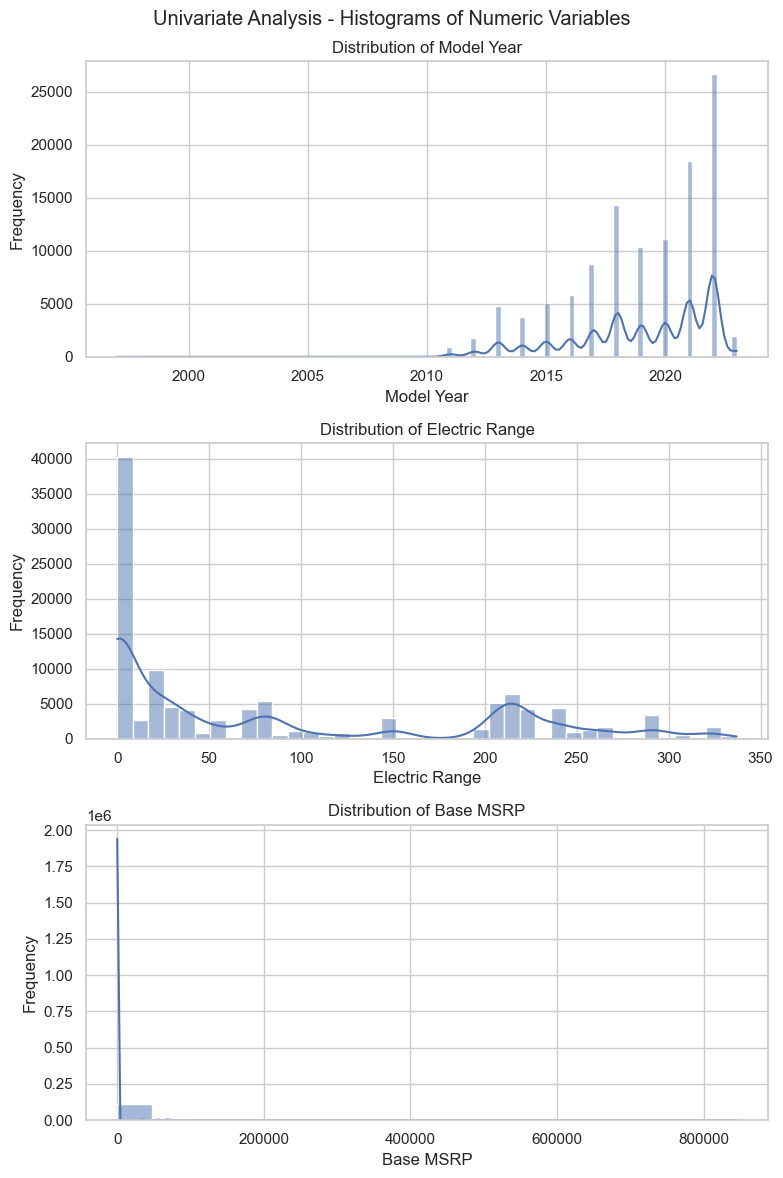

In [5]:
sns.set(style="whitegrid")

# Descriptive statistics for numeric columns
numeric_columns = ['Model Year', 'Electric Range', 'Base MSRP']
print(data[numeric_columns].describe())

# Plot histograms for numeric columns
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 12))
fig.suptitle('Univariate Analysis - Histograms of Numeric Variables')

for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Frequency distribution for categorical columns

          Make           Electric Vehicle Type  \
count   112634                          112634   
unique      34                               2   
top      TESLA  Battery Electric Vehicle (BEV)   
freq     52078                           86044   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility   State  
count                                             112634  112634  
unique                                                 3      45  
top              Clean Alternative Fuel Vehicle Eligible      WA  
freq                                               58639  112348  


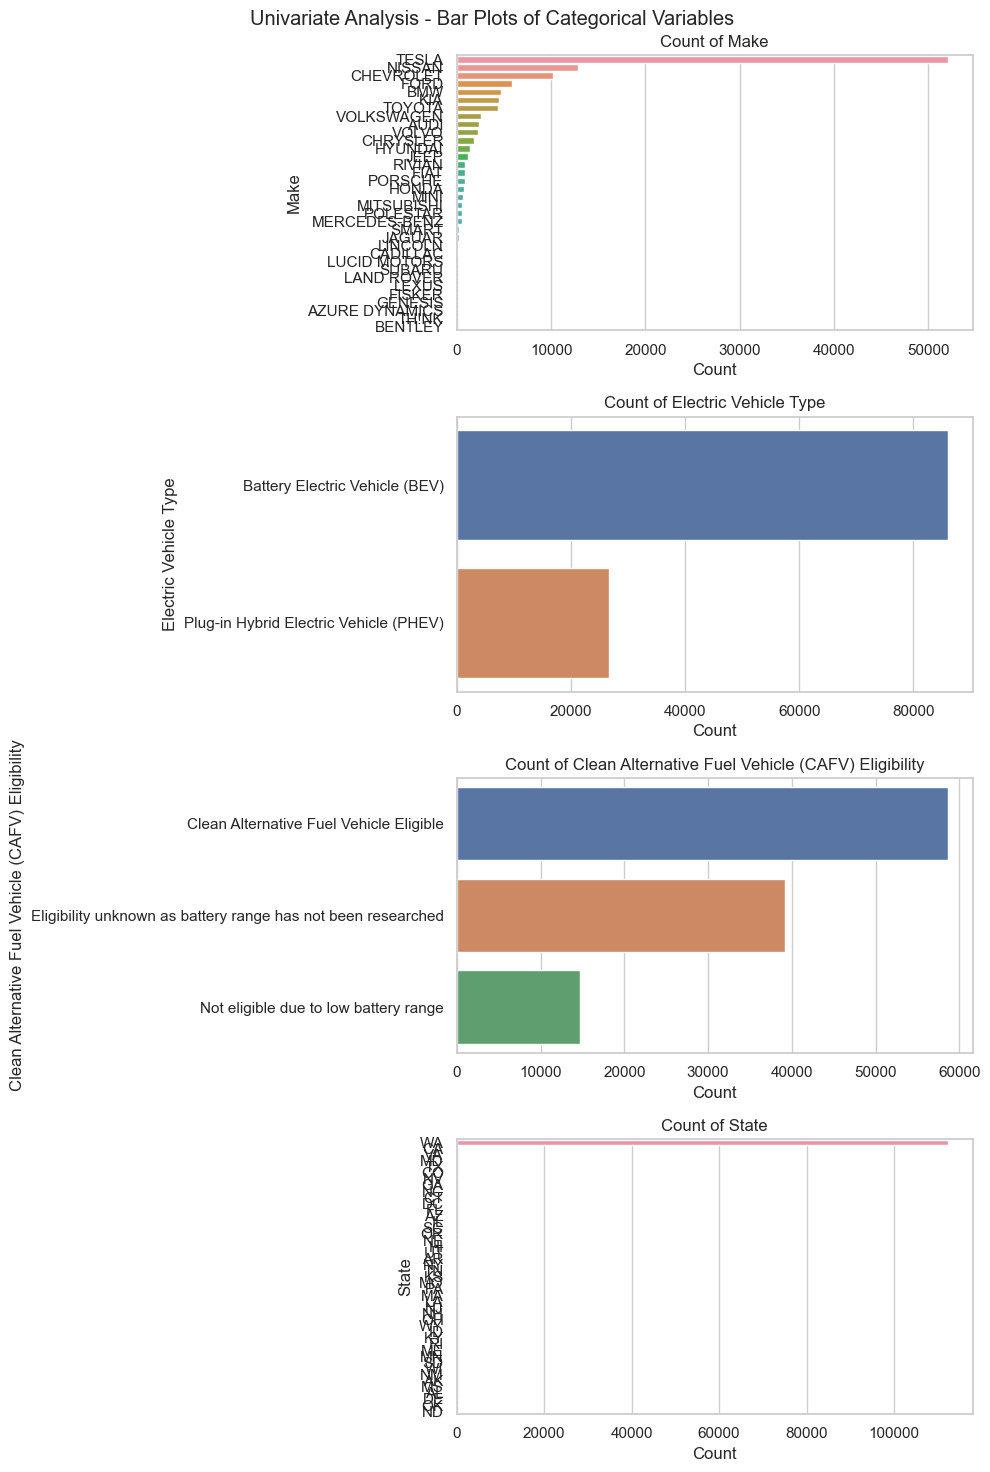

In [6]:
categorical_columns = ['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'State']
print(data[categorical_columns].describe())

# Plot bar plots for categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 15))
fig.suptitle('Univariate Analysis - Bar Plots of Categorical Variables')

for i, column in enumerate(categorical_columns):
    sns.countplot(y=data[column], order=data[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

## Bivariate Analysis

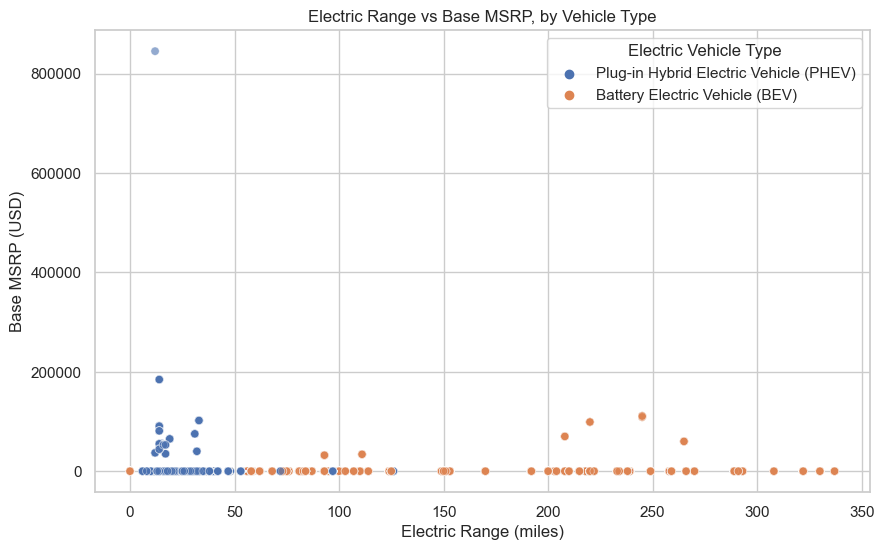

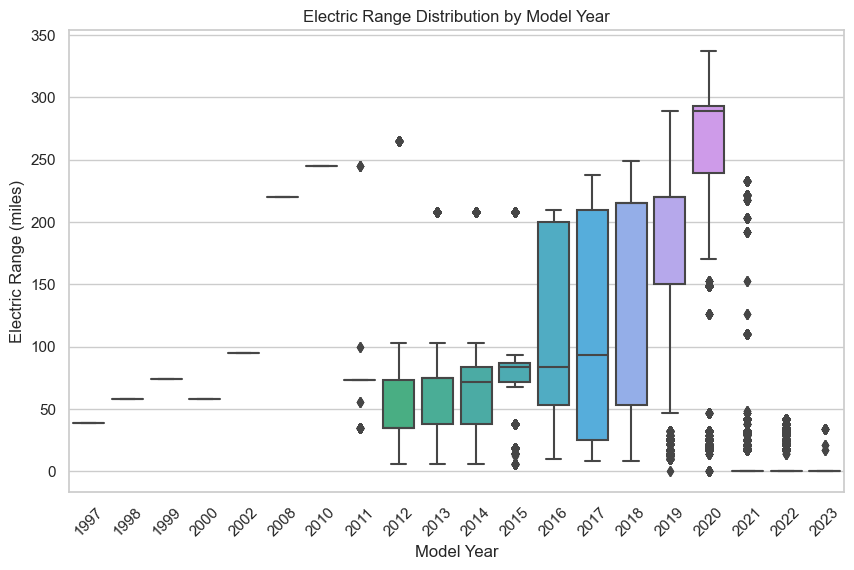

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type', data=data, alpha=0.6)
plt.title('Electric Range vs Base MSRP, by Vehicle Type')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP (USD)')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Box plot of Electric Range grouped by Model Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=data)
plt.title('Electric Range Distribution by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

## Box plot of Electric Range grouped by CAFV Eligibility

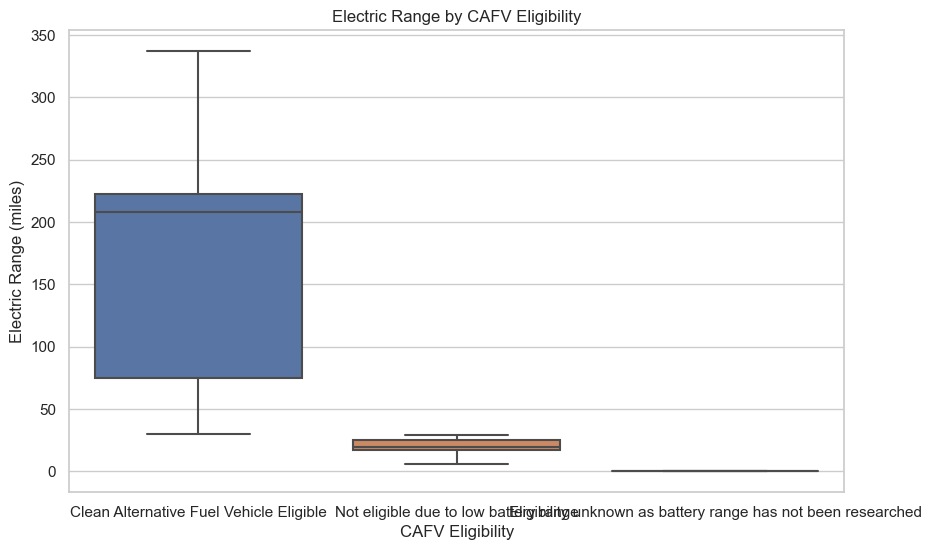

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=data)
plt.title('Electric Range by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range (miles)')
plt.show()